# Implementing RandomSearchCV from scratch (without scikit-learn)

Grid Search can be thought of as an exhaustive search for selecting a model. In Grid Search, the data scientist sets up a grid of hyperparameter values and for each combination, trains a model and scores on the testing data. In this approach, every combination of hyperparameter values is tried which can be very inefficient. For example, searching 20 different parameter values for each of 4 parameters will require 160,000 trials of cross-validation. This equates to 1,600,000 model fits and 1,600,000 predictions if 10-fold cross validation is used. While Scikit Learn offers the GridSearchCV function to simplify the process, it would be an extremely costly execution both in computing power and time.

### An alternative way to perform hyperparameter optimization is to perform random sampling on the grid and perform k-fold cross-validation on some randomly selected cells.

Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score. This allows you to explicitly control the number of parameter combinations that are attempted. The number of search iterations is set based on time or resources. Scikit Learn offers the RandomizedSearchCV function for this process.

So reducing computational expense using RandomizedSearchCV() is its greatest benefit

For example
- Searching 10 parameters (each range of 1000)
- Require 10,000 trials of CV
- 100,000 model fits with 10-fold CV
- 100,000 predictions with 10-fold CV

`RandomizedSearchCV()` searches a subset of the parameters, and you control the computational "budget" You can decide how long you want it to run for depending on the computational time we have

Scikit-learn provides an optimizer called **`RandomizedSearchCV()`** to perform a random search for the purpose of hyperparameter optimization.

Notice that **`RandomizedSearchCV()`** requires the extra `n_iter` argument, which determines how many random cells must be selected. This determines how many times k-fold cross-validation will be performed. Therefore, by choosing a smaller number, fewer hyperparameter combinations will be considered and the method will take less time to complete. Also, please note that the param_grid argument is changed to param_distributions here. The param_distributions argument can take a dictionary with parameter names as keys, and either list of parameters or distributions as values for each key.

It could be argued that **`RandomizedSearchCV()`** is not as good as **`GridSearchCV()`** since it does not consider all the possible values and combinations of values for hyperparameters, which is reasonable. As a result, one smart way of performing hyperparameter tuning for deep learning models is to start with either **`RandomizedSearchCV()`** on many hyperparameters, or **`GridSearchCV()`** on fewer hyperparameters with larger gaps between them.

By beginning with a randomized search on many hyperparameters, we can determine which hyperparameters have the most influence on a model's performance. It can also help narrow down the range for important hyperparameters. Then, you can complete your hyperparameter tuning by performing **`GridSearchCV()`** on the smaller number of hyperparameters and the smaller ranges for each of them. This is
called the coarse-to-fine approach to hyperparameter tuning. Now, you are ready to practice implementing hyperparameter tuning using scikit-learn optimizers. In the next activity, you will try to improve your model for the diabetes dataset by tuning the hyperparameters.


### How does `sklearn.model_selection.RandomizedSearchCV` work?


#### So, if tuning the hyperparametes of a random-forest classifier

The first step is to write the parameters that we want to consider and from these parameters select the best ones.

```python
param = {‘max_depth: [6,9, None],
         ‘n_estimators’:[50, 70, 100, 150],
          'max_features': randint(1,6),
          'criterion' : ['gini', 'entropy'],
          'bootstrap':[True, False],
          'mln_samples_leaf': randint(1,4)}
```

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
from tqdm import  tqdm
import random

In [2]:
x, y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=60)

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

print('X_train :', X_train)
X_train.shape

X_train : [[ 0.45267141 -1.42381257]
 [ 0.61696406 -0.00418956]
 [-1.80708012 -1.34499648]
 ...
 [ 0.63107723 -0.4743162 ]
 [-0.47320722 -0.6387028 ]
 [ 1.07909424 -1.67541279]]


(7500, 2)

In [3]:
print('y_train : ', y_train)
y_train.shape

y_train :  [0 0 1 ... 0 1 0]


(7500,)

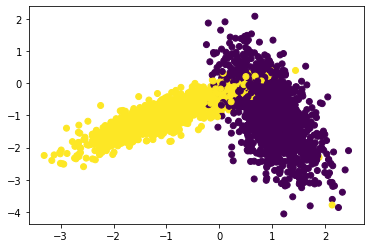

In [4]:
import matplotlib.pyplot as plt
colors = { 0: 'red', 1: 'blue'}
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.show()

# Actual Implementing Custom RandomSearchCV (without scikit-learn)

### The Algorithim steps to implement RandomSearchCV


<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter

</pre>


In [5]:
from sklearn.metrics import accuracy_score


def randomized_search_cv_custom(x_train_total, y_train_total, classifier, param_range, num_of_total_fold):
    # x_train_total: its numpy array of shape, (n,d)
    # y_train_total: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: Integer representing how many hyper-parameters I am considering for each iteration
    # num_of_total_fold: an integer, represents number of num_of_total_fold we need to devide the data and test our model

    # generating hyper-parameter range
    # generate 10 unique values(uniform random distribution) in the given range - starting 1 to "param_range"
    # ex: if param_range = 50, we need to generate 10 random numbers in range 1 to 50
    ten_random_values_for_param_range = sorted(random.sample(range(1, param_range), 10))

    train_scores = []
    test_scores = []

    classifier_params = { 'n_neighbors': ten_random_values_for_param_range }
    # it will take classifier and set of values for hyper parameters in dict type
    # dict({hyper parmeter: [list of values]})
    # as we are implementing this only for KNN, the hyper parameter should be n_neighbors
    # And I will return it from the function at the end so that I can use this same hyper-param
    # while plotting the graph as well

    for k in tqdm(classifier_params['n_neighbors']):
        trainscores_folds = []
        testscores_folds = []

        for fold in range(0, num_of_total_fold):
            # divide numbers ranging from  0 to len(x_train_fold) into groups = num_of_total_fold
            # basically, splitting the data into k groups (k = len(x_train_fold) / num_of_total_fold)
            # It works by first training the algorithm on the k_1 group of the data and
            # evaluating it on the kth hold-out group as the test set. This is repeated
            # so that each of the k groups is given an opportunity to be held out and used as the test set.
            # ex: num_of_total_fold=3, and len(x_train_total)=100, we can divide numbers from 0 to 100 into 3 groups
            # group 1: 0-33, group 2:34-66, group 3: 67-100
            num_of_elements_in_each_fold = int(len(x_train_total) / num_of_total_fold)

            # for each hyperparameter that we generated in step 1:
            # and using the above groups we have created in step 2 you will do cross-validation as follows

            # first we will keep group 1+group 2 i.e. 0-66 as train data and
            # group 3: 67-100 as test data, and find train and test accuracies
            # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and
            # group 2: 34-66 as test data, and find train and test accuracies
            # third we will keep group 2+group 3 i.e. 34-100 as train data and
            # group 1: 0-33 as test data, and find train and test accuracies
            # based on the 'num_of_total_fold' value we will do the same procedure

            # NOW IMPLEMENTATION OF THE CONCEPT OF 'fold' as below
            # For each of this inner loop running for values of fold (where fold represents num_of_total_fold of 0, 1, 2, 3 ...)
            # each of the test_indices will have the data of a single fold ( which is = num_of_elements_in_each_fold )
            # i.e. the test_indices will be the range starting at
            # num_of_elements_in_each_fold * fold and ending at num_of_elements_in_each_fold * (fold + 1)
            # And this whole range needs to be converted to list => then apply set() to the list
            # => and then again converted to list
            test_indices = list(set(list(range((num_of_elements_in_each_fold * fold), (num_of_elements_in_each_fold*(fold+1))))))
            # print('test_indices ', test_indices)

            # And the rest of the indices of the dataset will be the train_indices
            train_indices = list(set(list(range(0, len(x_train_total)))) - set(test_indices) )
            # print('train_indices ', train_indices)

            ''' So for a dataset of total 100 rows, one loop of fold, will have the following test_indices and train_indices

            test_indices  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

            train_indices  [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]

            And the next loop of j will have as below (for the same dataset of total 100 rows )

            test_indices  [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
            
            train_indices  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]
            '''

            # after we have above, now select datapoints based on test_indices and train_indices
            x_train_fold = x_train_total[train_indices]
            y_train_fold = y_train_total[train_indices]
            x_test_fold = x_train_total[test_indices]
            y_test_fold = y_train_total[test_indices]

            # Now based on our classifier assign corresponding parameter values
            # and also fit() and predict()
            classifier.n_neighbors = k
            classifier.fit(x_train_fold, y_train_fold)

            # First predict based on x_test_fold and keep the accuracy score in the testscores_folds
            y_predicted = classifier.predict(x_test_fold)
            testscores_folds.append(accuracy_score(y_test_fold, y_predicted))

            # Now run prediction based on x_train_fold and append the accuracy score in the trainscores_folds
            y_predicted = classifier.predict(x_train_fold)
            trainscores_folds.append(accuracy_score(y_train_fold, y_predicted))

        train_scores.append(np.mean(np.array(trainscores_folds)))
        test_scores.append(np.mean(np.array(testscores_folds)))

    return train_scores, test_scores, classifier_params

In [6]:

from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Our Classifier is KNN, hence assign a variable to it.
neigh = KNeighborsClassifier()
params_range = 50
number_of_total_folds = 3

# Now invoking our custom function randomized_search_cv_custom(x_train,y_train,classifier, param_range, num_of_total_fold) and store the returned values
testscores, trainscores, params = randomized_search_cv_custom(X_train, y_train, neigh, params_range, number_of_total_folds)

print('trainscores are: ', trainscores)
print('testscores are: ', testscores)

100%|██████████| 10/10 [00:06<00:00,  1.56it/s]

trainscores are:  [0.9296000000000001, 0.9409333333333333, 0.9541333333333334, 0.9561333333333333, 0.9553333333333334, 0.9556, 0.9556, 0.9558666666666666, 0.9564, 0.9561333333333334]
testscores are:  [1.0, 0.9677333333333333, 0.9575999999999999, 0.9579333333333334, 0.9576666666666666, 0.9579333333333334, 0.9579333333333334, 0.9582666666666667, 0.9580666666666667, 0.9579333333333334]


## Plotting hyper-parameter vs accuracy plot

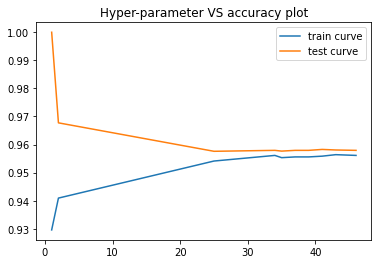

In [7]:
# Now plotting hyper-parameter vs accuracy plot to choose the best hyperparameter
plt.plot(params['n_neighbors'], trainscores, label='train curve')
plt.plot(params['n_neighbors'], testscores, label='test curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()


In [8]:
def plot_decision_boundary(X1, X2, y, clf):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

## Plotting the decision boundaries for the model initialized with the best hyperparameter

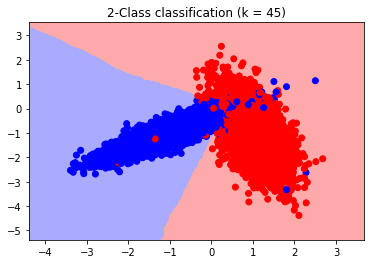

In [9]:
# plotting the decision boundaries for the model initialized with the best hyperparameter (45)
neigh = KNeighborsClassifier(n_neighbors = 45)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)